# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus Project

This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview

The dataset is part of the Allen Institute's Openscope project, which explores neural responses to visual stimuli across various brain regions. The dataset contains data from extracellular electrophysiology studies performed on mice. For more details, visit the [Dandiset 000690](https://dandiarchive.org/dandiset/000690).

## What the Notebook Covers

In this notebook, we will:
- Load metadata and assets using the DANDI API.
- Access and explore data from an NWB file.
- Visualize select data to understand its structure and properties.

## Required Packages
- pynwb
- dandi
- h5py
- matplotlib
- remfile

In [1]:
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt

## Loading Dandiset Metadata and Assets

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"Found {len(assets)} assets in the dataset")
print("First 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015
Found 156 assets in the dataset
First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049.nwb


## Exploring an NWB File

In [3]:
# Load
url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## NWB Metadata

In [4]:
# Display basic metadata
print(f"Session ID: {nwb.identifier}")
print(f"Session Date: {nwb.session_start_time.isoformat()}")
print(f"Experiment Institution: {nwb.institution}")

Session ID: 1298465622
Session Date: 2023-09-21T00:00:00-07:00
Experiment Institution: Allen Institute


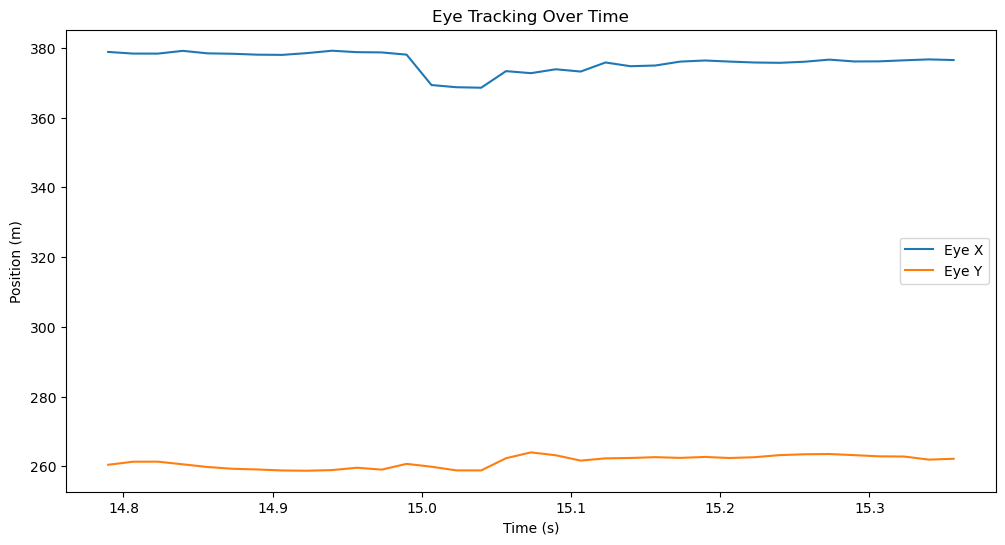

In [5]:
# Display the available eye-tracking data
eye_tracking_data = nwb.acquisition["EyeTracking"].spatial_series["corneal_reflection_tracking"].data[0:50, :]
timestamps = nwb.acquisition["EyeTracking"].spatial_series["corneal_reflection_tracking"].timestamps[0:50]

# Plot a sample of the eye-tracking data
plt.figure(figsize=(12, 6))
plt.plot(timestamps, eye_tracking_data[:, 0], label='Eye X')
plt.plot(timestamps, eye_tracking_data[:, 1], label='Eye Y')
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Eye Tracking Over Time")
plt.legend()
plt.show()

## Future Directions

Further analysis could include exploring relationships between neuronal activities and visual stimuli, as well as more in-depth investigations within specific brain regions. Using the intervals data, one can understand the exact timing of stimulus presentations and correlate them with recorded neural responses.